                    Zomato Data Analysis Project

In [7]:
import sys

In [8]:
print(sys.executable) 

C:\Users\Admin\AppData\Local\Programs\Python\Python312\python.exe


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("Zomato_data .csv") 

In [14]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [15]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [16]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [ ]:
#covnert data type of column rate 

In [18]:
def handleRate(value):
    value = str(value).split('/')
    value=value[0]
    return float(value)
df['rate']= df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Q1. what type of restaurant do the majority of customer order from?


C:\Users\Admin\AppData\Local\Temp\ipykernel_21932\1819653869.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['listed_in(type)'], palette='tab10')


Text(0.5, 0, 'Type of Restaurant')

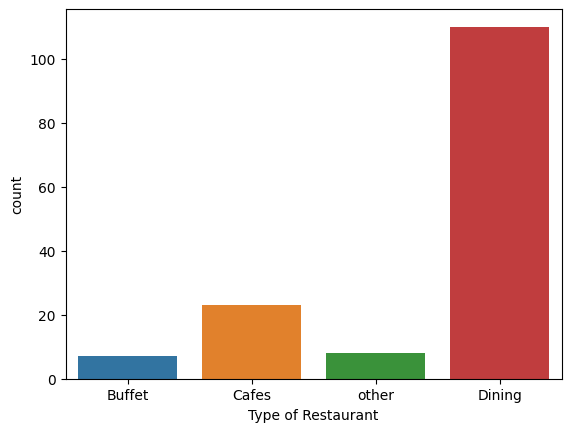

In [25]:
sns.countplot(x=df['listed_in(type)'], palette='tab10')
plt.xlabel("Type of Restaurant")

            Conclusion- majority of the restaurant falls in dinning category.

Q2.How many votes has each type of restaurant received from customers? 

In [30]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


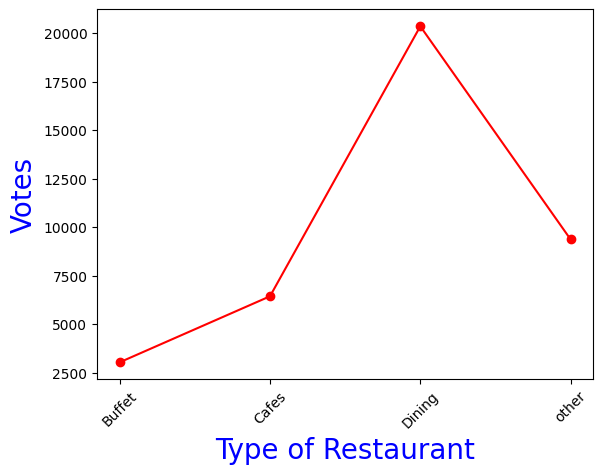

In [36]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({"Votes": grouped_data})

plt.plot(result.index, result["Votes"], c='red', marker='o')
plt.xlabel("Type of Restaurant", c='blue',size=20)
plt.ylabel("Votes", color="blue", size=20)
plt.xticks(rotation=45)
plt.show()


                Conclusion- dinning resturants  has received maximum votes.

Q3. What are rating that the majority of restaurant received?

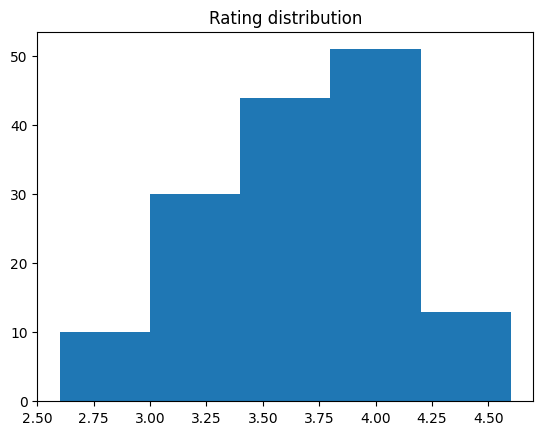

In [40]:
plt.hist(df['rate'],bins=5)
plt.title("Rating distribution")
plt.show()

        Conclusion- The majority resturants received rating from 3.5 to 4

Q4.Zomato has observed that most couples order most of their food online.
    What is their average spending on each order?

In [41]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\Admin\AppData\Local\Temp\ipykernel_21932\3536240877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['approx_cost(for two people)'], palette='tab10')


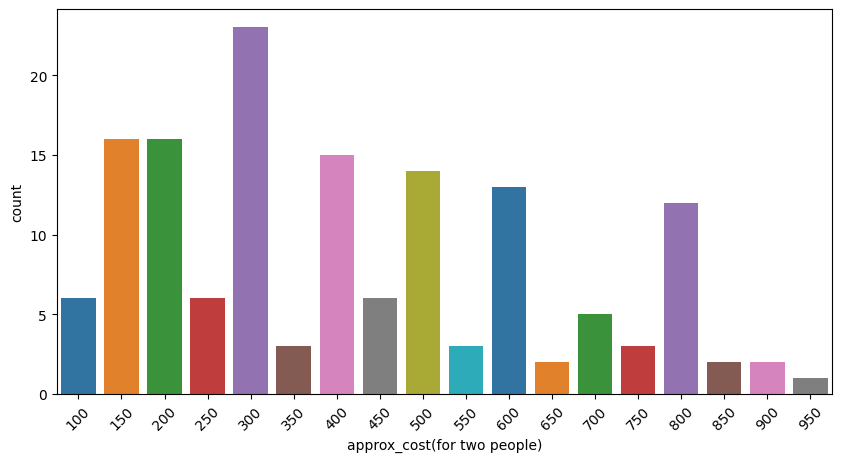

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['approx_cost(for two people)'], palette='tab10')
plt.xticks(rotation=45)
plt.show()


        Conclusion- majority of couple approximate  cost of 300 Rs.

    Q5.Which mode(online or offline) has received the maximum rating?

In [52]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

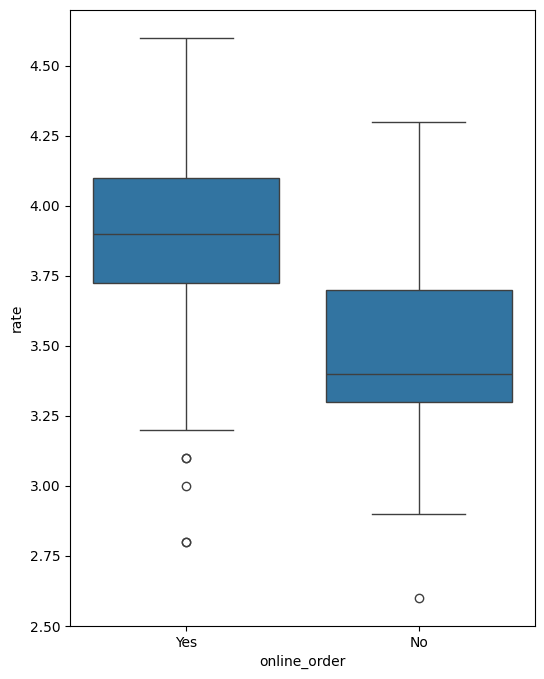

In [56]:
plt.figure(figsize= (6,8))
sns.boxplot(x="online_order", y="rate" , data= df)

        Conclusion -Offline order received lower rating in comparison to online order.

Q6.Which type of restaurant received more offline orders, 
so that Zomato can customers with some good offers?

In [57]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


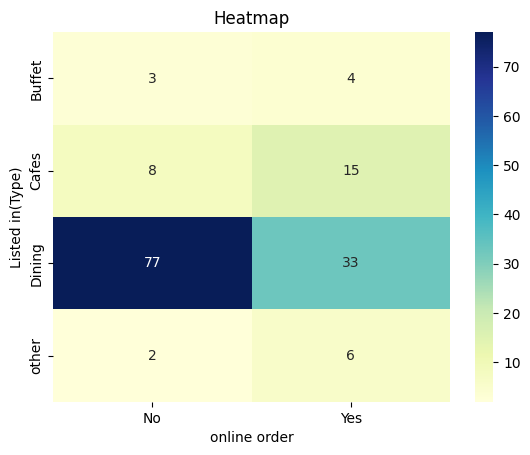

In [59]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order' , aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('online order')
plt.ylabel('Listed in(Type)')
plt.show()

 Conclusion-Dining restaurants primarily accept offline orders, whereas cafes primarily 
            receive online orders. This suggests that clients prefer to place
             orders in person at restaurants, but prefer online ordering at cafes.